In [4]:
import os, pickle
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore")
import models.utils as utils
import csv

from torchvision import transforms
import evals.embed_evals as evals
import pickle
import utils.plot_data as plot
import shutil
# import gen_triplets
import pandas as pd
from omegaconf import OmegaConf as oc

In [92]:
df = evals.get_wv_df()
features = ["bodysz", "bodyheadszratio", "bodycolor", "bodyheadcolordiff", "bodycolorlighter"]

In [146]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def draw_wv(bodysz, bodyheadszratio, bodycolor, bodyheadcolordiff, bodycolorlighter):
    body_w = bodysz*10/2
    body_h = body_w*0.65
    head_w, head_h = body_h*bodyheadszratio, body_w*bodyheadszratio

    u_1 = 5-head_w

    ell_1 = Ellipse(xy=(u_1,5),width=body_w*2,height=body_h*2) 
    ell_2 = Ellipse(xy=(5+body_w,5),width=(5-u_1)*2,height=(head_h)*2) 

    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(10,10))

    ## colors
    bodycolor = 1-bodycolor 
    headcolor = bodycolor-bodyheadcolordiff#  else bodycolor+bodyheadcolordiff
    if bodycolorlighter == 1: headcolor = 1-bodyheadcolordiff
    print(headcolor)
    if headcolor > 1: headcolor = 1
    if headcolor < 0: headcolor = 0 
    
    ax.add_artist(ell_1)
    ell_1.set_alpha(bodycolor)
    bodycolor = (0,0,0) if bodycolorlighter == 0 else (80/255,80/255,80/255)
    ell_1.set_facecolor(bodycolor)
    ax.add_artist(ell_2)
    ell_2.set_alpha(headcolor)
    ell_2.set_facecolor((0,0,0))
    
    ## legs
    leg_1_0 = (u_1, 5+body_h)
    leg_1_1 = (u_1-0.8, 5+body_h+0.4)
    leg_2_0 = (u_1, 5-body_h)
    leg_2_1 = (u_1-0.8, 5-body_h-0.4)

    x_values = [leg_1_0[0], leg_1_1[0]]
    y_values = [leg_1_0[1], leg_1_1[1]]
    plt.plot(x_values, y_values, color="black") 

    x_values = [leg_2_0[0], leg_2_1[0]]
    y_values = [leg_2_0[1], leg_2_1[1]]
    plt.plot(x_values, y_values, color="black") 

    ax.set_xlim(0,10)
    ax.set_ylim(0,10)

    plt.show()

0.8200000000000001


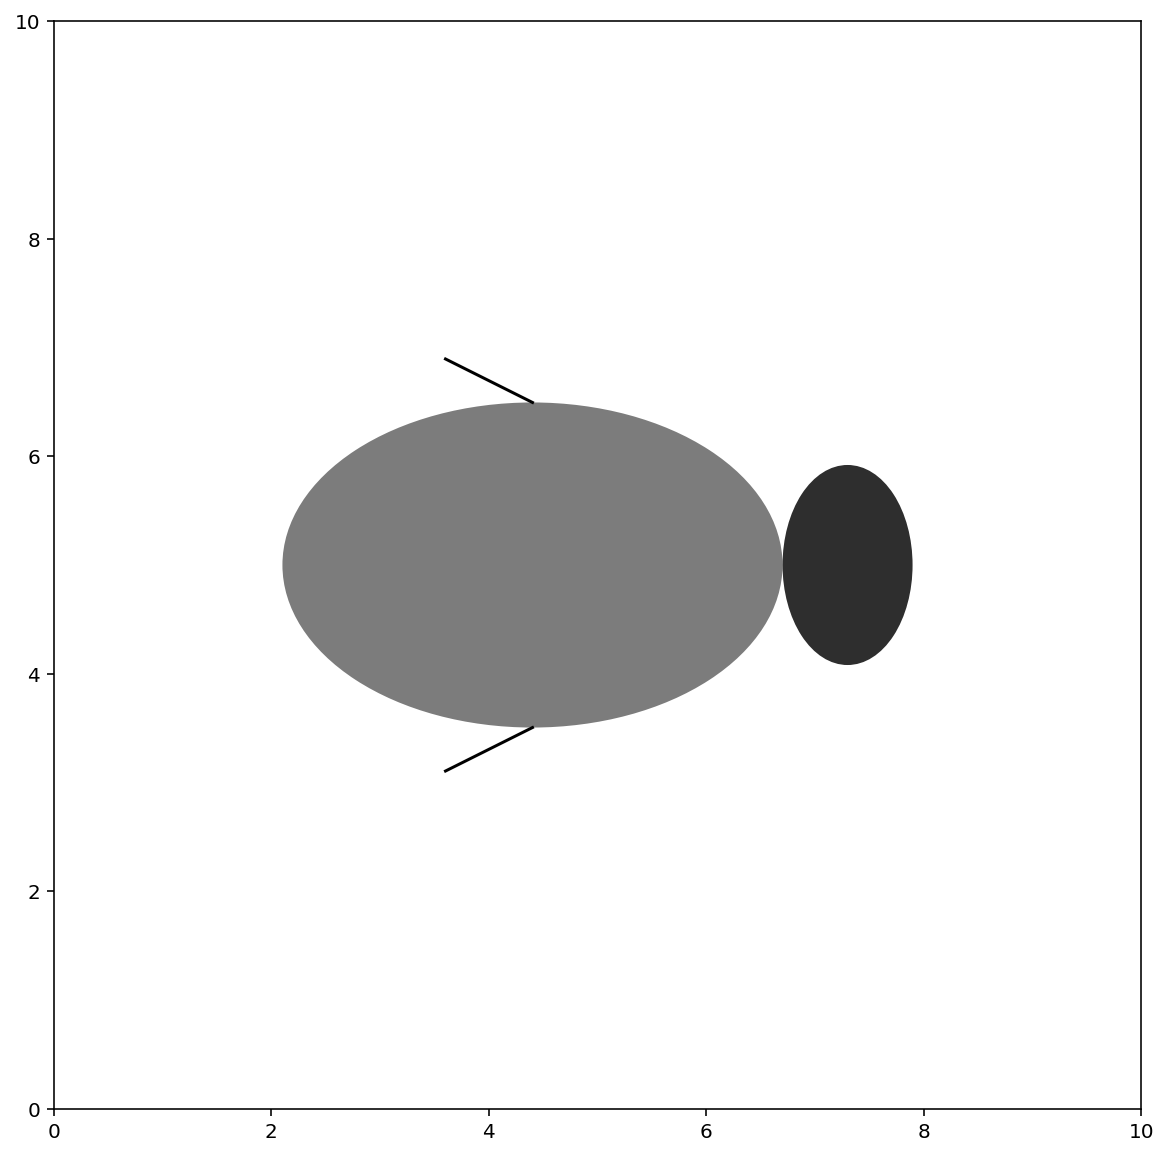

In [148]:

args = df.iloc[14][features].to_dict()
draw_wv(**args)

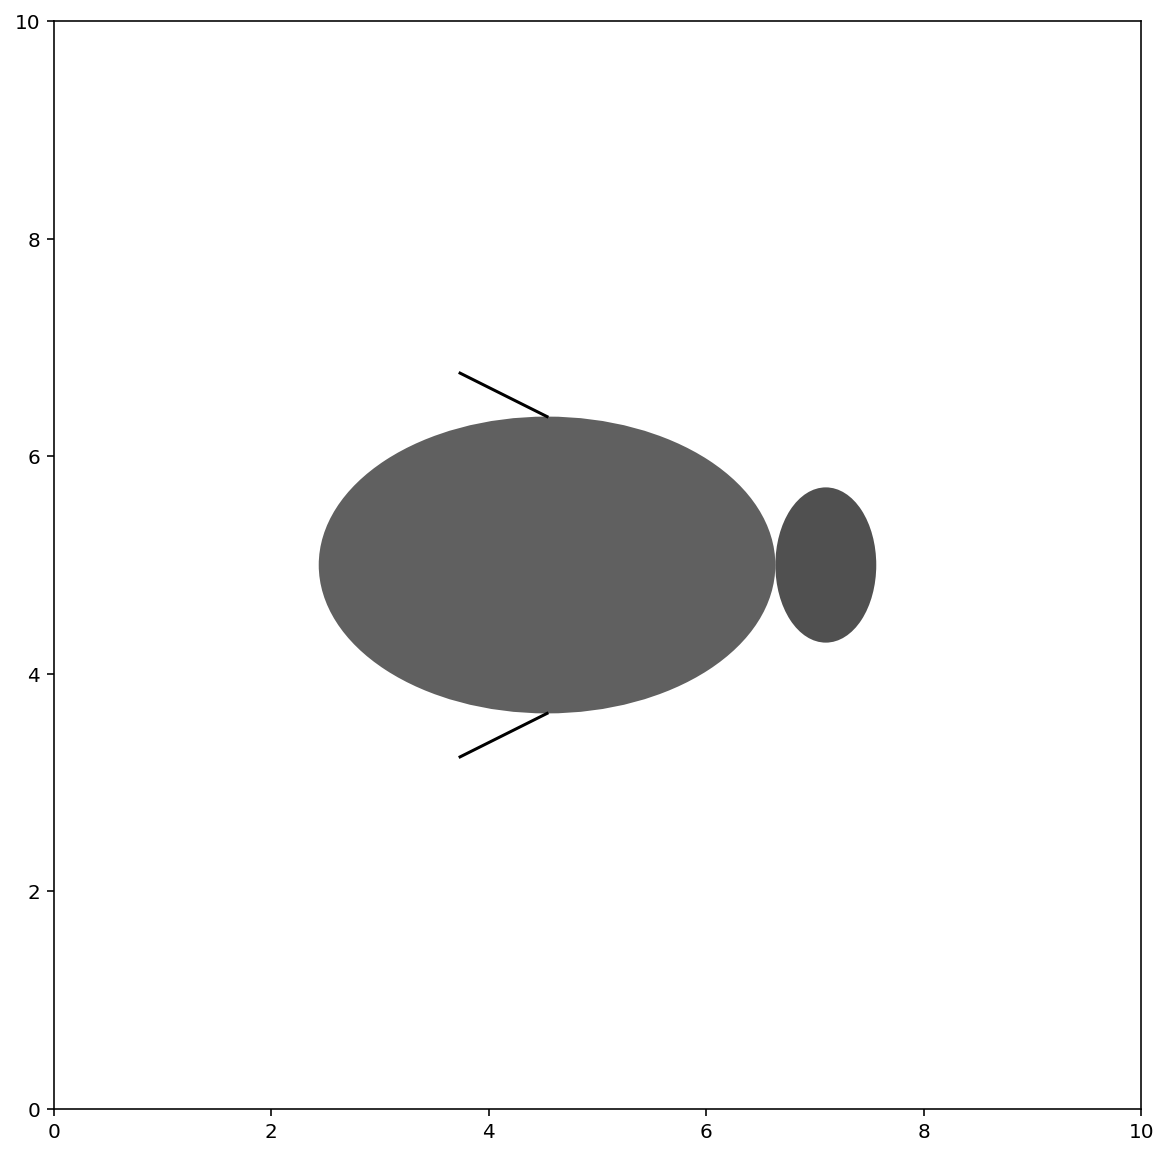

In [124]:
for i in range(13,14):
    args = df.iloc[i][features].to_dict()
    draw_wv(**args)

In [45]:
draw_bug(a_1=4, b_1=3, a_2=0.3, b_2=0.5, random_seed=4, alpha1=1, alpha2=1)
draw_bug(a_1=2.5, b_1=2, a_2=0.3, b_2=0.5, random_seed=4, alpha1=1, alpha2=1)

TypeError: draw_bug() got an unexpected keyword argument 'a_1'

In [2]:
RESN_train = pickle.load(open("embeds/bm/RESN_baseline/ResNet18_train_emb1000.pkl","rb"))
y_train = [0]*60+[1]*60


TSNEing


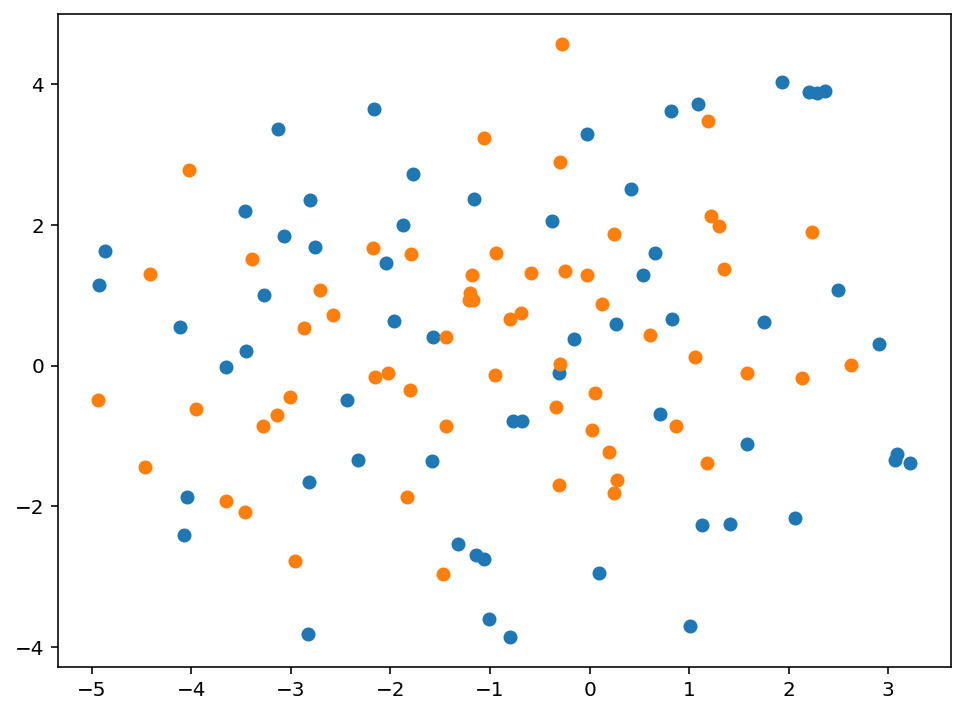

In [7]:
_ = plot.plot_data(RESN_train, y_train)

In [9]:
MTL_bm_train = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/bm/prolific/MTL_train_emb10.pkl","rb"))
MTL_bm_valid = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/bm/prolific/MTL_valid_emb10.pkl","rb"))
MTL_bm_test = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/bm/prolific/MTL_test_emb10.pkl","rb"))
y_train = [0]*60+[1]*60
y_valid,y_test =[0]*20+[1]*20,[0]*20+[1]*20 
# plot.plot_all_embeds(MTL_bm_train,MTL_bm_valid,MTL_bm_test,y_train,y_valid,y_test,
# title="MTL bm prolific triplets",
# save=True)

TSNEing


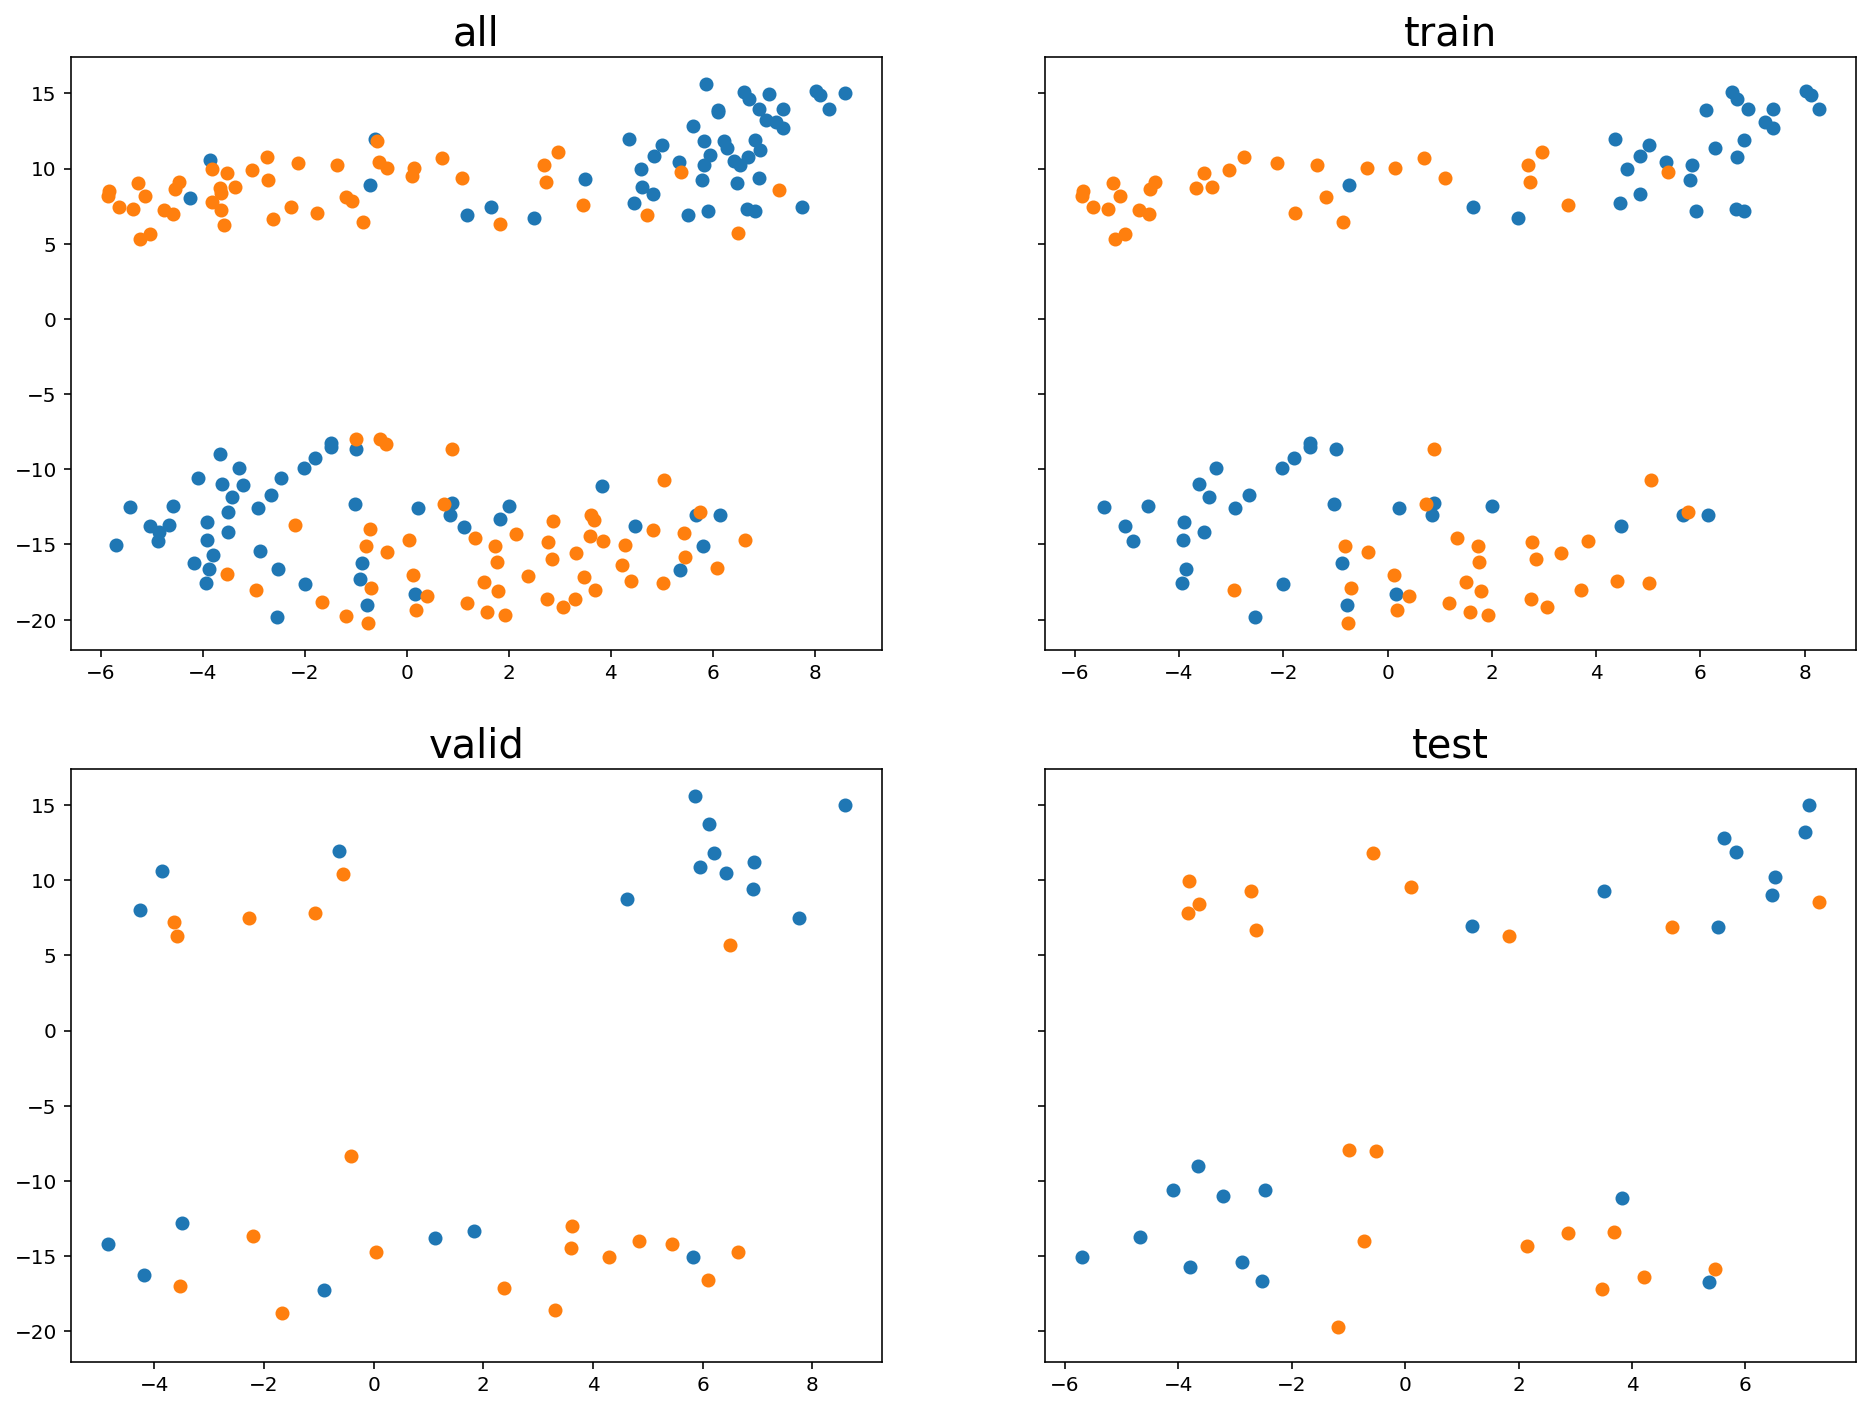

In [2]:
TN_bm_train = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/bm/prolific/TN_train_emb10.pkl","rb"))
TN_bm_valid = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/bm/prolific/TN_valid_emb10.pkl","rb"))
TN_bm_test = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/bm/prolific/TN_test_emb10.pkl","rb"))
y_train = [0]*60+[1]*60
y_valid,y_test =[0]*20+[1]*20,[0]*20+[1]*20 
plot.plot_all_embeds(TN_bm_train,TN_bm_valid,TN_bm_test,y_train,y_valid,y_test)

TSNEing


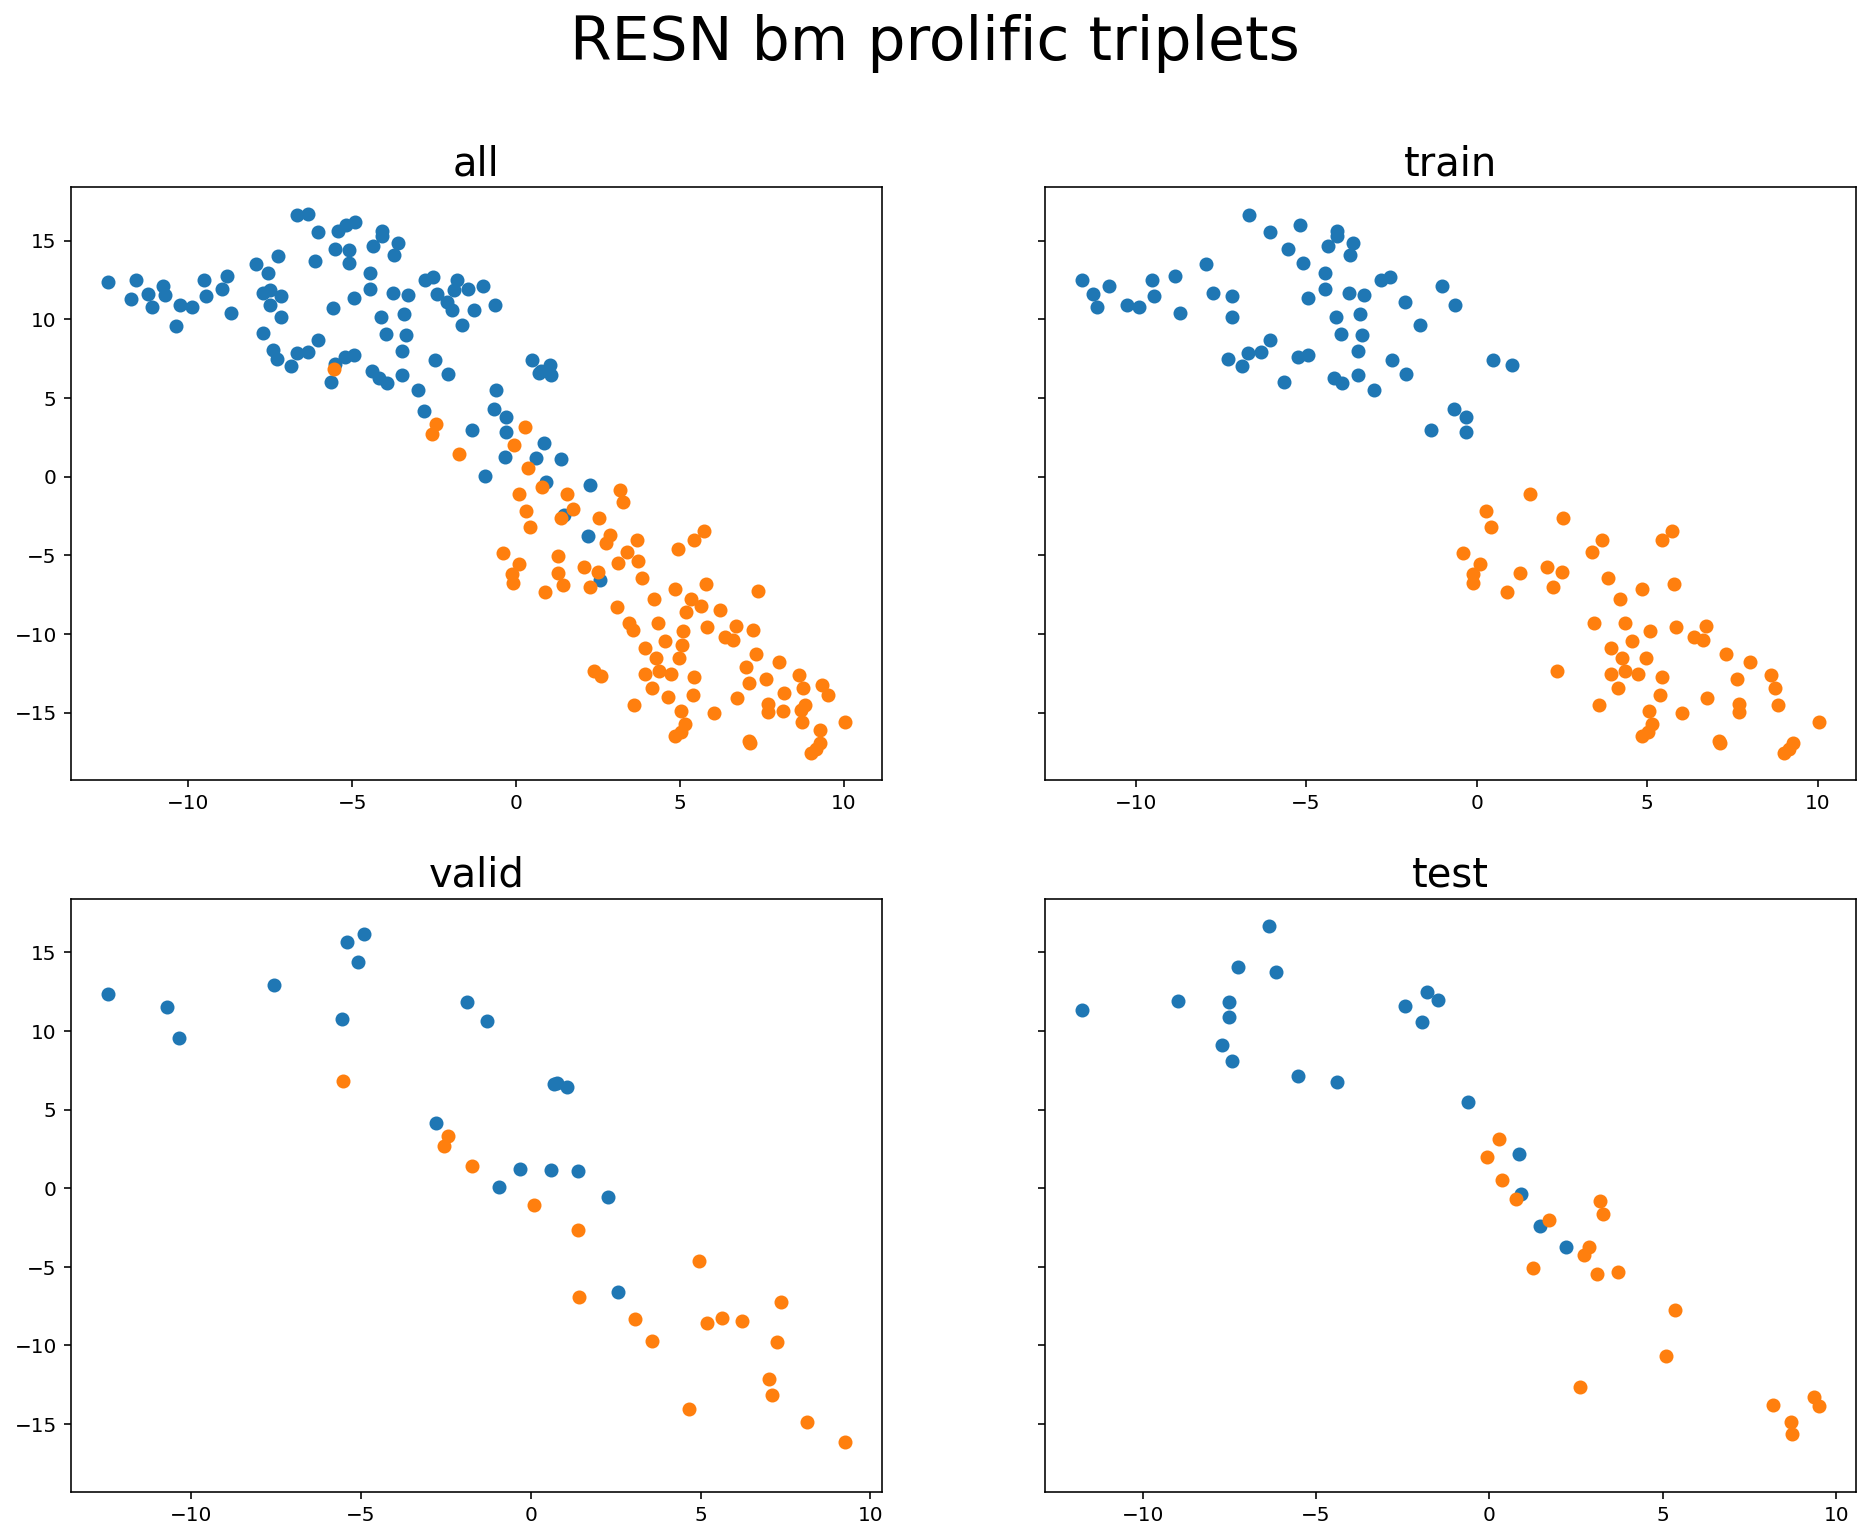

In [4]:
resn_bm_train = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/bm/prolific/RESN_train_emb10.pkl","rb"))
resn_bm_valid = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/bm/prolific/RESN_valid_emb10.pkl","rb"))
resn_bm_test = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/bm/prolific/RESN_test_emb10.pkl","rb"))
y_train = [0]*60+[1]*60
y_valid,y_test =[0]*20+[1]*20,[0]*20+[1]*20 
plot.plot_all_embeds(resn_bm_train,resn_bm_valid,resn_bm_test,y_train,y_valid,y_test,
title="RESN bm prolific triplets", save=True)

In [5]:
bm_RESN_allclass = evals.nn_allclass(RESN_bm_train, y_train, RESN_bm_test, y_test)
bm_RESN_1class = evals.nn_1class(RESN_bm_train, y_train, RESN_bm_test, y_test)
bm_TN_allclass = evals.nn_allclass(TN_bm_train, y_train, TN_bm_test, y_test)
bm_TN_1class = evals.nn_1class(TN_bm_train, y_train, TN_bm_test, y_test)

In [13]:
pickle.dump(bm_resn_allclass, open("examples/nn_allclass/bm_RESN.pkl","wb"))
pickle.dump(bm_resn_1class, open("examples/nn_1class/bm_RESN.pkl","wb"))
pickle.dump(bm_TN_allclass, open("examples/nn_allclass/bm_TN.pkl","wb"))
pickle.dump(bm_TN_1class, open("examples/nn_1class/bm_TN.pkl","wb"))

In [ ]:
bm_MTL_allclass = evals.nn_allclass(MTL_bm_train, y_train, MTL_bm_test, y_test)
bm_MTL_1class = evals.nn_1class(MTL_bm_train, y_train, MTL_bm_test, y_test)
pickle.dump(bm_MTL_allclass, open("examples/nn_allclass/bm_MTL.pkl","wb"))
pickle.dump(bm_MTL_1class, open("examples/nn_1class/bm_MTL.pkl","wb"))